<a href="https://colab.research.google.com/github/khosroheidari/KHOSRO-HEIDARI/blob/main/optimize%20a%20users%20portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python.
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [12]:
#Get the stock starting date
stockStartDate = '2013-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
today



'2020-11-05'

In [21]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

  


In [22]:
 df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.094694,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.878920,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.408764,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.312239,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.356150,13.880000,365.280823
...,...,...,...,...,...
2020-10-29,280.829987,3211.010010,115.320000,504.209991,1567.239990
2020-10-30,263.109985,3036.149902,108.860001,475.739990,1621.010010
2020-11-02,261.359985,3004.479980,108.769997,484.119995,1626.030029


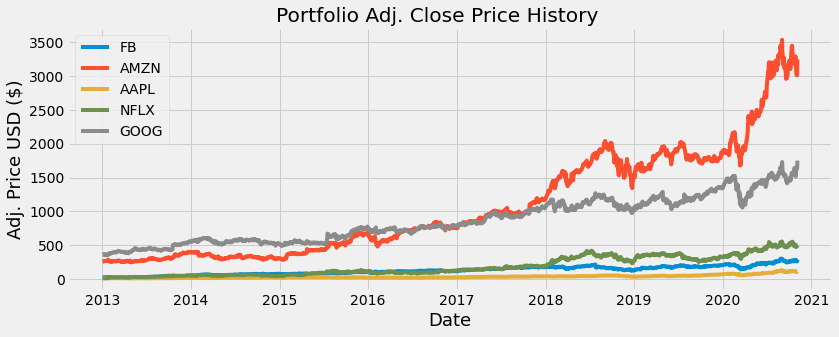

In [23]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [24]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-10-29,0.049165,0.015249,0.037050,0.036957,0.033377
2020-10-30,-0.063099,-0.054456,-0.056018,-0.056465,0.034309
2020-11-02,-0.006651,-0.010431,-0.000827,0.017615,0.003097


In [25]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119713,0.055249,0.044930,0.056637,0.050878
AMZN,0.055249,0.094739,0.039905,0.063563,0.048335
AAPL,0.044930,0.039905,0.081896,0.034978,0.038945
NFLX,0.056637,0.063563,0.034978,0.212627,0.049380
GOOG,0.050878,0.048335,0.038945,0.049380,0.066714


In [26]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06165146387024523

In [27]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24829712819572688

In [28]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3625110757949434

In [29]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 36.0%
Annual volatility/standard deviation/risk : 25.0%
Annual variance : 6.0%


In [30]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [32]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [33]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.11815), ('AMZN', 0.33033), ('AAPL', 0.21483), ('NFLX', 0.3367), ('GOOG', 0.0)])
Expected annual return: 42.5%
Annual volatility: 27.5%
Sharpe Ratio: 1.47


(0.42458978901401956, 0.27541728839595736, 1.469006507799015)

In [34]:
pip install pulp

     |████████████████████████████████| 40.6MB 103kB/s 


In [35]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 5, 'AMZN': 2, 'AAPL': 27, 'NFLX': 8}
Funds remaining: $1.53
